In [50]:
#Decision Tree Analysis for Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler

In [51]:
dataset = pd.read_csv("spectogramextractedmusicfeatureset.csv")

In [52]:
dataset.shape

(1000, 31)

In [53]:
dataset.head()

,Filename,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.308197,0.082482,23.698370,1535.037572,0.001726,1834.035228,0.000684,3175.514131,0.070391,...,6.815101,0.110116,4.418635,-1.796708,-1.787790,0.341001,-2.629384,-0.309009,-0.734714,blues
1,blues.00001.wav,0.301338,0.064592,24.126800,1178.338976,0.000634,1719.624593,0.018852,2425.427000,0.044456,...,2.652497,0.832175,2.269111,-4.967726,-1.012166,0.995347,-0.605718,1.565148,-0.685939,blues
2,blues.00002.wav,0.296208,0.121434,25.195057,1303.581375,0.000763,1579.884288,0.022247,2479.285008,0.064793,...,4.676634,-7.930208,-5.197453,-8.683246,0.549078,-7.521339,-4.570396,-3.990504,-3.933193,blues
3,blues.00003.wav,0.378564,0.117686,23.537749,765.650527,0.000240,1289.465222,0.008652,1387.583276,0.024866,...,5.115472,0.440344,-1.861215,0.198612,1.217629,-0.756340,1.820389,-0.057328,-4.009497,blues
4,blues.00004.wav,0.261476,0.060902,25.022190,1539.421609,0.001334,1584.038983,-0.050764,2954.190470,0.085597,...,-6.884608,-6.819392,-12.406286,-10.841472,-8.155150,-5.439511,-1.908890,-7.093715,-17.604401,blues


In [54]:
X = dataset.drop(['Filename','label'],axis=1) #Filename is not required
Y = dataset['label']

In [55]:
features = ['Chromagram','RootMeanSquare','LowEnergyBrightness','SpectralCentroid','Flatness','Bandwidth','InHarmonicity','Rolloff','ZeroCrossingRate','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']
# Separating out the features
x = X.loc[:, features].values
# Separating out the target
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.10)

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
Y_pred = classifier.predict(X_test)

In [59]:
#Have to remove filename and label for this to work and then point Y at the label for each
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 3  0  0  0  2  1  1  0  0  1]
 [ 0 11  0  0  0  3  0  0  0  0]
 [ 0  0  3  1  0  0  0  0  0  3]
 [ 1  1  0  3  2  0  0  0  1  0]
 [ 0  1  0  3  6  0  0  1  1  0]
 [ 0  0  4  0  0  7  1  0  0  0]
 [ 2  0  0  2  0  0  8  0  1  1]
 [ 0  0  0  3  2  0  0  4  0  2]
 [ 0  0  2  1  0  2  0  1  3  0]
 [ 0  0  0  1  0  0  3  0  0  1]]
              precision    recall  f1-score   support

       blues       0.50      0.38      0.43         8
   classical       0.85      0.79      0.81        14
     country       0.33      0.43      0.38         7
       disco       0.21      0.38      0.27         8
      hiphop       0.50      0.50      0.50        12
        jazz       0.54      0.58      0.56        12
       metal       0.62      0.57      0.59        14
         pop       0.67      0.36      0.47        11
      reggae       0.50      0.33      0.40         9
        rock       0.12      0.20      0.15         5

    accuracy                           0.49       100
   macro avg       

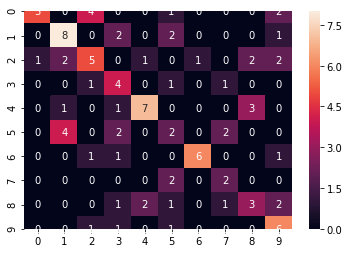

In [37]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)

In [38]:
#Decision Tree Analysis for Regression
dataset2 = pd.read_csv("spectogramextractedmusicfeatureset.csv")

In [39]:
dataset2

,Filename,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.308197,0.082482,23.698370,1535.037572,0.001726,1834.035228,0.000684,3175.514131,0.070391,...,6.815101,0.110116,4.418635,-1.796708,-1.787790,0.341001,-2.629384,-0.309009,-0.734714,blues
1,blues.00001.wav,0.301338,0.064592,24.126800,1178.338976,0.000634,1719.624593,0.018852,2425.427000,0.044456,...,2.652497,0.832175,2.269111,-4.967726,-1.012166,0.995347,-0.605718,1.565148,-0.685939,blues
2,blues.00002.wav,0.296208,0.121434,25.195057,1303.581375,0.000763,1579.884288,0.022247,2479.285008,0.064793,...,4.676634,-7.930208,-5.197453,-8.683246,0.549078,-7.521339,-4.570396,-3.990504,-3.933193,blues
3,blues.00003.wav,0.378564,0.117686,23.537749,765.650527,0.000240,1289.465222,0.008652,1387.583276,0.024866,...,5.115472,0.440344,-1.861215,0.198612,1.217629,-0.756340,1.820389,-0.057328,-4.009497,blues
4,blues.00004.wav,0.261476,0.060902,25.022190,1539.421609,0.001334,1584.038983,-0.050764,2954.190470,0.085597,...,-6.884608,-6.819392,-12.406286,-10.841472,-8.155150,-5.439511,-1.908890,-7.093715,-17.604401,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,0.312355,0.066177,26.828857,1585.924113,0.001471,1878.318531,-0.020311,3388.996174,0.066483,...,10.070771,-10.888953,2.198623,-8.872386,-0.953045,-12.683362,0.744433,-4.840060,-3.064359,rock
996,rock.00096.wav,0.346405,0.060725,26.802236,1685.060612,0.001741,1869.974954,-0.012931,3395.737800,0.080015,...,12.185410,-15.749372,2.540702,-1.597802,0.542841,-10.845517,-0.644788,-7.396799,-5.802427,rock
997,rock.00097.wav,0.366321,0.060540,26.163345,1807.488277,0.002249,1787.003967,0.003787,3561.578464,0.103777,...,6.846561,-16.928728,-3.545232,-11.599463,-2.044957,-12.994104,0.291607,-13.022841,-6.441196,rock
998,rock.00098.wav,0.327976,0.071790,25.974198,1047.122495,0.000313,1548.829422,0.020775,2153.220313,0.036349,...,5.102398,-8.889581,-3.410276,-4.522196,-5.790967,-3.085016,0.166745,-4.406106,-5.594728,rock


In [40]:
dataset2.describe()

,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,mfcc1,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.333224,0.093445,24.006154,1813.318264,0.007775,2058.827528,0.002901,3837.241337,0.078116,-212.602457,...,-4.462664,3.870602,-3.666807,0.889851,-3.142839,0.251357,-3.555951,-0.245435,-1.997249,-2.082225
std,0.068664,0.046023,2.631803,652.799688,0.014345,558.974469,0.012741,1581.718954,0.033641,94.206489,...,6.991569,7.063549,6.582388,5.633460,5.570438,5.440868,5.452512,4.943435,4.844141,5.147865
min,0.168471,0.004785,16.145770,440.430373,0.000015,767.359912,-0.056269,643.521109,0.012361,-595.072083,...,-27.275131,-18.428173,-29.258093,-16.019083,-19.591047,-18.942125,-20.107542,-16.221340,-20.573647,-25.201431
25%,0.284129,0.060679,22.133863,1270.488982,0.000683,1629.125586,-0.004895,2489.634946,0.052638,-269.064232,...,-9.346228,-0.693223,-8.193978,-2.794991,-6.811125,-3.162907,-7.119595,-3.320340,-4.890920,-5.305882
50%,0.332359,0.087046,23.809909,1792.149320,0.002886,2055.029642,0.003166,3831.039334,0.074226,-193.476837,...,-4.308345,3.653320,-3.371776,0.953899,-3.088581,0.475194,-3.813880,-0.326095,-2.192323,-2.284844
75%,0.374406,0.122140,25.687964,2259.144242,0.009166,2398.259212,0.011006,4882.847557,0.098221,-143.868298,...,0.528303,8.615487,1.172422,4.460984,0.621503,3.531713,-0.019003,3.021724,1.033056,1.113118
max,0.608037,0.282533,31.752847,4537.019851,0.252005,3460.468856,0.038988,8303.916454,0.291544,-36.345001,...,16.976814,23.993357,15.121124,17.865473,16.362213,18.551638,21.321997,21.003050,25.728180,23.052797


In [43]:
X = dataset2.drop(['Filename','label'],axis=1) #Filename is not required
Y = dataset2['Chromagram'] 
#Has to be a float number for this type of decision tree otherwise use label

In [44]:
features = ['Chromagram','RootMeanSquare','LowEnergyBrightness','SpectralCentroid','Flatness','Bandwidth','InHarmonicity','Rolloff','ZeroCrossingRate','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']
# Separating out the features
x = X.loc[:, features].values
# Separating out the target
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.20, random_state=0)

In [46]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [47]:
Y_pred = regressor.predict(X_test)

In [48]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
df

,Actual,Predicted
993,0.297683,0.297436
859,0.322412,0.322309
298,0.250067,0.249271
553,0.288820,0.288928
672,0.393058,0.392385
...,...,...
679,0.406066,0.406498
722,0.330347,0.331184
215,0.313733,0.313984
653,0.439419,0.440092


In [49]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.001050528733454872
Mean Squared Error: 1.2013641474291683e-05
Root Mean Squared Error: 0.003466070033091034
